**Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

**Data Preprocessing**


In [16]:
import pandas as pd
from google.colab import files

print("Please upload 'CAR DETAILS FROM CAR DEKHO (1).csv' when prompted.")
uploaded = files.upload()

# Assuming the file 'CAR DETAILS FROM CAR DEKHO (1).csv' is now in your Colab environment,
# you can read it directly:
df = pd.read_csv('car data.csv')
df

Please upload 'CAR DETAILS FROM CAR DEKHO (1).csv' when prompted.


Saving car data.csv to car data (2).csv


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [18]:
#Converting the Year Columns
Age = []
for i in df['Year']:
    Age.append(2019-i)
df.insert(2, 'Age', Age)
df.drop(columns=['Car_Name', 'Year'],inplace=True)

In [19]:
#Converting Categorical Variables
data = {
    'Fuel_Type': df['Fuel_Type'].value_counts(),
    'Seller_Type': df['Seller_Type'].value_counts(),
    'Transmission': df['Transmission'].value_counts(),
    'Owner': df['Owner'].value_counts()
}

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_attr = ['Fuel_Type', 'Seller_Type', 'Transmission']
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.insert(8, 'Fuel_Type_n', df.Fuel_Type+2)
df.drop(columns=['Fuel_Type'],inplace=True)
df.insert(8, 'Seller_Type_n', df.Seller_Type+2)
df.drop(columns=['Seller_Type'],inplace=True)
df.insert(8, 'Transmission_n', df.Transmission+2)
df.drop(columns=['Transmission'],inplace=True)
df.insert(8, 'Owner_n', df.Owner+2)
df.drop(columns=['Owner'],inplace=True)
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_n,Seller_Type_n,Transmission_n,Owner_n
0,5,3.35,5.59,27000,4,2,3,2
1,6,4.75,9.54,43000,3,2,3,2
2,2,7.25,9.85,6900,4,2,3,2
3,8,2.85,4.15,5200,4,2,3,2
4,5,4.60,6.87,42450,3,2,3,2
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,3,2
297,4,4.00,5.90,60000,4,2,3,2
298,10,3.35,11.00,87934,4,2,3,2
299,2,11.50,12.50,9000,3,2,3,2


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type_n,301.0,3.787375,0.425801,2.00,4.0,4.0,4.0,4.0
Seller_Type_n,301.0,2.352159,0.478439,2.00,2.0,2.0,3.0,3.0
Transmission_n,301.0,2.867110,0.340021,2.00,3.0,3.0,3.0,3.0
Owner_n,301.0,2.043189,0.247915,2.00,2.0,2.0,2.0,5.0


**Data Visualization**

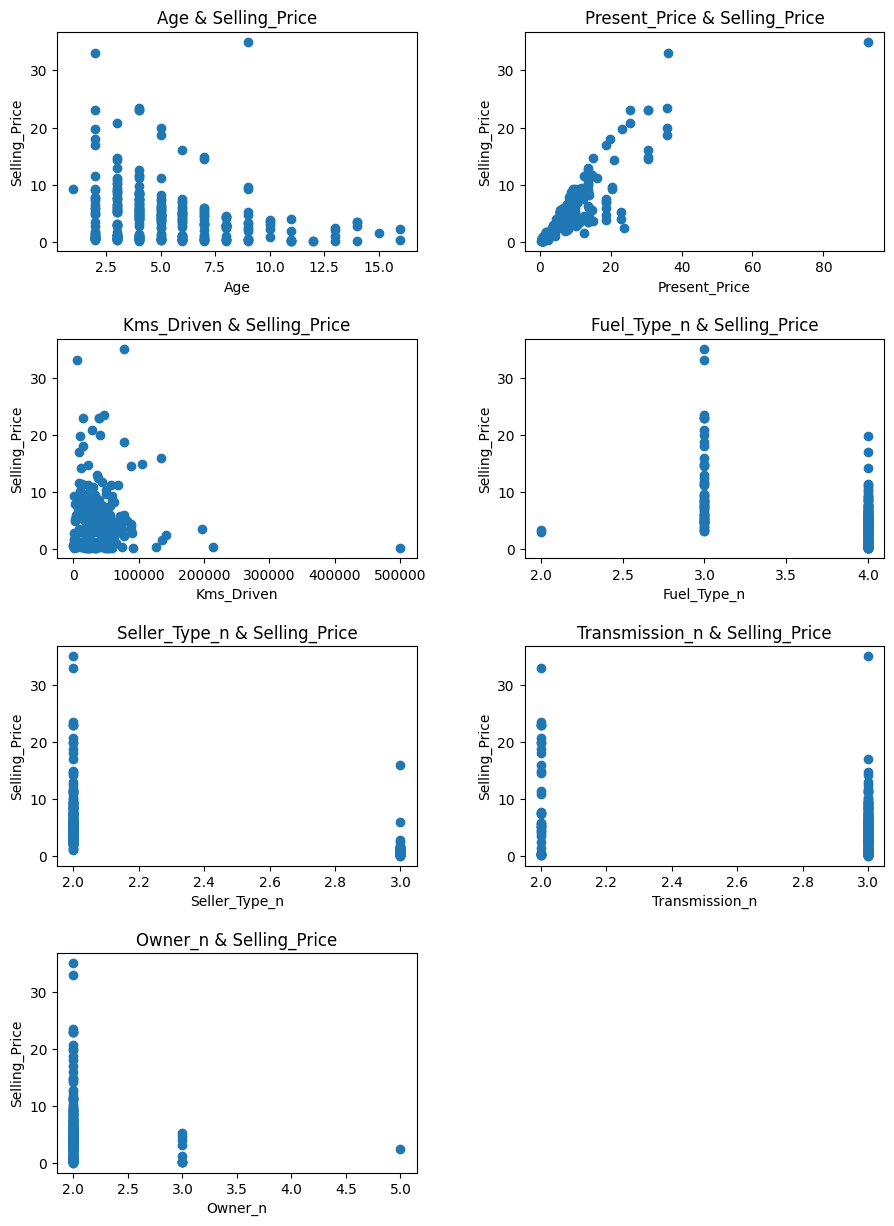

In [21]:
variables = ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type_n', 'Seller_Type_n', 'Transmission_n', 'Owner_n']
num_plots = len(variables)
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 12))
fig.tight_layout()
for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(df[var], df['Selling_Price'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Selling_Price')
    axs[row, col].set_title(f'{var} & Selling_Price')
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

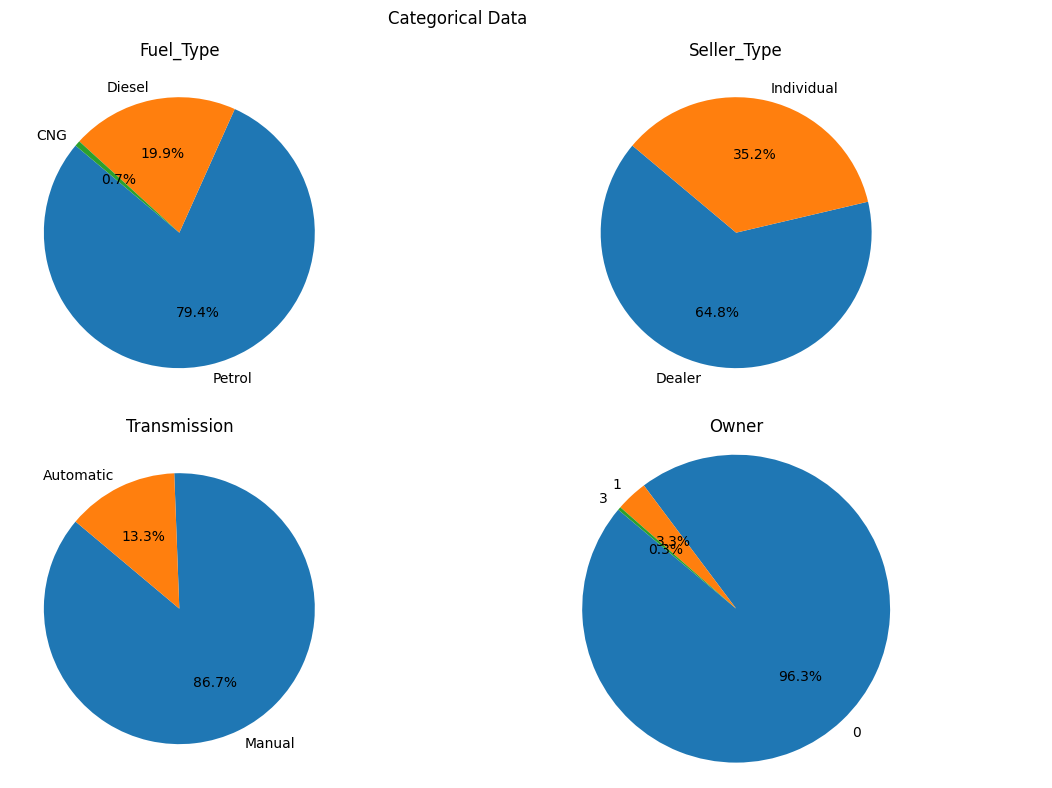

In [22]:
#Pie Charts for Categorical Data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Categorical Data')
for i, (column_name, values_array) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    categories = list(values_array.index)
    values = list(values_array)
    axs[row, col].pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
    axs[row, col].set_title(column_name)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
#Find und drop the Missing_Value of the dataset
df.isnull().sum()

,0
Age,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type_n,0
Seller_Type_n,0
Transmission_n,0
Owner_n,0


**Training the Model**

In [24]:
x = pd.DataFrame(df, columns=['Age','Present_Price','Kms_Driven','Fuel_Type_n','Seller_Type_n','Transmission_n','Owner_n'])
y = df['Selling_Price'].values.reshape(-1,1)

In [26]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results_df = pd.DataFrame(columns=['Test Size', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y_test, y_pred)
    new_row = {
        'Test Size': test_size,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2_score
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
print(results_df)

   Test Size       MAE       MSE      RMSE  R2 Score
0       0.10  1.137708  2.783195  1.668291  0.873552
1       0.15  1.118331  2.553088  1.597838  0.890299
2       0.20  1.000033  2.188556  1.479377  0.913418
3       0.25  1.187585  4.412086  2.100496  0.861975
4       0.30  1.216519  4.416789  2.101616  0.852311


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (240, 7)
x_test (61, 7)
y_train (240, 1)
y_test (61, 1)


In [28]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  1.0000326012146679
Mean Squared Error:  2.188556445657865
Root Mean Squared Error:  1.4793770464820202
R2 Score:  0.9134181721224437
